In [1]:
import pandas as pd
import pandas_ta as ta
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy import stats

In [2]:
df=pd.read_excel('NEDL_Portfolio_Evaluation.xlsx',index_col='Unnamed: 0')[['Artisan Global Opportunities','Barings Fixed Income','S&P 500','US 10-year bond yield']].dropna()
df

,Artisan Global Opportunities,Barings Fixed Income,S&P 500,US 10-year bond yield
2007-12-31,1148.58,3313.76,1468.3600,4.0232
2008-01-31,1037.86,3373.76,1380.2835,3.5931
2008-02-29,1008.07,3366.48,1335.4384,3.5092
2008-03-31,999.20,3361.26,1329.6650,3.4096
2008-04-30,1071.64,3358.05,1394.4310,3.7279
...,...,...,...,...
2019-08-31,3235.61,5608.48,3752.1537,1.4961
2019-09-30,3235.93,5580.21,3822.3592,1.6646
2019-10-31,3309.06,5596.89,3905.1411,1.6910
2019-11-30,3411.64,5595.90,4046.8974,1.7758


In [3]:
scaled=pd.DataFrame(columns=['Artisan Global Opportunities','Barings Fixed Income','S&P 500','US 10-year bond yield'],index=df.index)
scaled['Artisan Global Opportunities']=100*(1+df['Artisan Global Opportunities'].pct_change()).cumprod()
scaled['Barings Fixed Income']=100*(1+df['Barings Fixed Income'].pct_change()).cumprod()
scaled['S&P 500']=100*(1+df['S&P 500'].pct_change()).cumprod()
scaled['US 10-year bond yield']=df['US 10-year bond yield']
scaled=scaled.fillna(100)
scaled

,Artisan Global Opportunities,Barings Fixed Income,S&P 500,US 10-year bond yield
2007-12-31,100.000000,100.000000,100.000000,4.0232
2008-01-31,90.360271,101.810632,94.001709,3.5931
2008-02-29,87.766634,101.590942,90.947615,3.5092
2008-03-31,86.994376,101.433417,90.554428,3.4096
2008-04-30,93.301294,101.336548,94.965199,3.7279
...,...,...,...,...
2019-08-31,281.705236,169.248226,255.533636,1.4961
2019-09-30,281.733097,168.395116,260.314855,1.6646
2019-10-31,288.100089,168.898472,265.952566,1.6910
2019-11-30,297.031117,168.868596,275.606622,1.7758


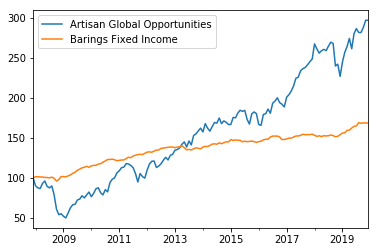

In [4]:
scaled[['Artisan Global Opportunities','Barings Fixed Income']].plot()

In [5]:
scaled['Monthly risk-free']=(1+scaled['US 10-year bond yield']/100)**(1/12)-1
scaled['Return_A']=(scaled['Artisan Global Opportunities']/scaled['Artisan Global Opportunities'].shift(1))-1
scaled['Return_B']=(scaled['Barings Fixed Income']/scaled['Barings Fixed Income'].shift(1))-1
scaled['Return_C']=(scaled['S&P 500']/scaled['S&P 500'].shift(1))-1

In [6]:
scaled

,Artisan Global Opportunities,Barings Fixed Income,S&P 500,US 10-year bond yield,Monthly risk-free,Return_A,Return_B,Return_C
2007-12-31,100.000000,100.000000,100.000000,4.0232,0.003292,NaN,NaN,NaN
2008-01-31,90.360271,101.810632,94.001709,3.5931,0.002946,-0.096397,0.018106,-0.059983
2008-02-29,87.766634,101.590942,90.947615,3.5092,0.002878,-0.028703,-0.002158,-0.032490
2008-03-31,86.994376,101.433417,90.554428,3.4096,0.002798,-0.008799,-0.001551,-0.004323
2008-04-30,93.301294,101.336548,94.965199,3.7279,0.003055,0.072498,-0.000955,0.048709
...,...,...,...,...,...,...,...,...
2019-08-31,281.705236,169.248226,255.533636,1.4961,0.001238,-0.017100,0.024743,-0.015840
2019-09-30,281.733097,168.395116,260.314855,1.6646,0.001377,0.000099,-0.005041,0.018711
2019-10-31,288.100089,168.898472,265.952566,1.6910,0.001398,0.022599,0.002989,0.021657
2019-11-30,297.031117,168.868596,275.606622,1.7758,0.001468,0.031000,-0.000177,0.036300


In [7]:
scaled['Excess Return_A']=scaled['Return_A'].values-scaled['Monthly risk-free'].values
scaled['Excess Return_B']=scaled['Return_B'].values-scaled['Monthly risk-free'].values
scaled['Excess Return_C']=scaled['Return_C'].values-scaled['Monthly risk-free'].values
scaled

,Artisan Global Opportunities,Barings Fixed Income,S&P 500,US 10-year bond yield,Monthly risk-free,Return_A,Return_B,Return_C,Excess Return_A,Excess Return_B,Excess Return_C
2007-12-31,100.000000,100.000000,100.000000,4.0232,0.003292,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-31,90.360271,101.810632,94.001709,3.5931,0.002946,-0.096397,0.018106,-0.059983,-0.099343,0.015160,-0.062929
2008-02-29,87.766634,101.590942,90.947615,3.5092,0.002878,-0.028703,-0.002158,-0.032490,-0.031582,-0.005036,-0.035368
2008-03-31,86.994376,101.433417,90.554428,3.4096,0.002798,-0.008799,-0.001551,-0.004323,-0.011597,-0.004348,-0.007121
2008-04-30,93.301294,101.336548,94.965199,3.7279,0.003055,0.072498,-0.000955,0.048709,0.069443,-0.004010,0.045654
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,281.705236,169.248226,255.533636,1.4961,0.001238,-0.017100,0.024743,-0.015840,-0.018338,0.023505,-0.017078
2019-09-30,281.733097,168.395116,260.314855,1.6646,0.001377,0.000099,-0.005041,0.018711,-0.001278,-0.006417,0.017334
2019-10-31,288.100089,168.898472,265.952566,1.6910,0.001398,0.022599,0.002989,0.021657,0.021201,0.001591,0.020259
2019-11-30,297.031117,168.868596,275.606622,1.7758,0.001468,0.031000,-0.000177,0.036300,0.029532,-0.001645,0.034832


In [8]:
matrix=pd.DataFrame(columns=['Artisan Global Opportunities','Barings Fixed Income','S&P 500'],index=['Annualised return','Annualised risk','Annualised risk-free','Sharp ratio','Beta','Treynor ratio',"Alpha(Jensen's)"])
matrix

,Artisan Global Opportunities,Barings Fixed Income,S&P 500
Annualised return,NaN,NaN,NaN
Annualised risk,NaN,NaN,NaN
Annualised risk-free,NaN,NaN,NaN
Sharp ratio,NaN,NaN,NaN
Beta,NaN,NaN,NaN
Treynor ratio,NaN,NaN,NaN
Alpha(Jensen's),NaN,NaN,NaN


In [9]:
matrix.loc['Annualised return','Artisan Global Opportunities']=(1+scaled['Return_A']).prod()**(1/12)-1
matrix

,Artisan Global Opportunities,Barings Fixed Income,S&P 500
Annualised return,0.094965,NaN,NaN
Annualised risk,NaN,NaN,NaN
Annualised risk-free,NaN,NaN,NaN
Sharp ratio,NaN,NaN,NaN
Beta,NaN,NaN,NaN
Treynor ratio,NaN,NaN,NaN
Alpha(Jensen's),NaN,NaN,NaN


In [10]:
matrix.loc['Annualised return','Artisan Global Opportunities']=(1+scaled['Return_A']).prod()**(1/12)-1
matrix.loc['Annualised return','Barings Fixed Income']=(1+scaled['Return_B']).prod()**(1/12)-1
matrix.loc['Annualised return','S&P 500']=(1+scaled['Return_C']).prod()**(1/12)-1
matrix.loc['Annualised risk','Artisan Global Opportunities']=np.sqrt(12)*scaled['Return_A'].std()
matrix.loc['Annualised risk','Barings Fixed Income']=np.sqrt(12)*scaled['Return_B'].std()
matrix.loc['Annualised risk','S&P 500']=np.sqrt(12)*scaled['Return_C'].std()
matrix.loc['Annualised risk-free','Artisan Global Opportunities']=0.0402
matrix.loc['Annualised risk-free','Barings Fixed Income']=0.0402
matrix.loc['Annualised risk-free','S&P 500']=0.0402
matrix.loc['Sharp ratio','Artisan Global Opportunities']=(matrix.loc['Annualised return','Artisan Global Opportunities']-matrix.loc['Annualised risk-free','S&P 500'])/matrix.loc['Annualised risk','Artisan Global Opportunities']
matrix.loc['Sharp ratio','Barings Fixed Income']=(matrix.loc['Annualised return','Barings Fixed Income']-matrix.loc['Annualised risk-free','S&P 500'])/matrix.loc['Annualised risk','Barings Fixed Income']
matrix.loc['Sharp ratio','S&P 500']=(matrix.loc['Annualised return','S&P 500']-matrix.loc['Annualised risk-free','S&P 500'])/matrix.loc['Annualised risk','S&P 500']
matrix.loc['Beta','Artisan Global Opportunities']=np.polyfit(scaled['Return_C'].dropna().values,scaled['Return_A'].dropna().values,1)[0]
matrix.loc['Beta','Barings Fixed Income']=np.polyfit(scaled['Return_C'].dropna().values,scaled['Return_B'].dropna().values,1)[0]
matrix.loc['Beta','S&P 500']=np.polyfit(scaled['Return_C'].dropna().values,scaled['Return_C'].dropna().values,1)[0]
matrix.loc['Treynor ratio','Artisan Global Opportunities']=(matrix.loc['Annualised return','Artisan Global Opportunities']-matrix.loc['Annualised risk-free','S&P 500'])/matrix.loc['Beta','Artisan Global Opportunities']
matrix.loc['Treynor ratio','Barings Fixed Income']=(matrix.loc['Annualised return','Barings Fixed Income']-matrix.loc['Annualised risk-free','S&P 500'])/matrix.loc['Beta','Barings Fixed Income']
matrix.loc['Treynor ratio','S&P 500']=(matrix.loc['Annualised return','S&P 500']-matrix.loc['Annualised risk-free','S&P 500'])/matrix.loc['Beta','S&P 500']
matrix.loc["Alpha(Jensen's)",'Artisan Global Opportunities']=(matrix.loc['Annualised return','Artisan Global Opportunities']-matrix.loc['Annualised risk-free','S&P 500'])-matrix.loc['Beta','Artisan Global Opportunities']*(matrix.loc['Annualised return','S&P 500']-matrix.loc['Annualised risk-free','Artisan Global Opportunities'])
matrix.loc["Alpha(Jensen's)",'Barings Fixed Income']=(matrix.loc['Annualised return','Barings Fixed Income']-matrix.loc['Annualised risk-free','S&P 500'])-matrix.loc['Beta','Barings Fixed Income']*(matrix.loc['Annualised return','S&P 500']-matrix.loc['Annualised risk-free','Barings Fixed Income'])
matrix.loc["Alpha(Jensen's)",'S&P 500']=(matrix.loc['Annualised return','S&P 500']-matrix.loc['Annualised risk-free','S&P 500'])-matrix.loc['Beta','S&P 500']*(matrix.loc['Annualised return','S&P 500']-matrix.loc['Annualised risk-free','S&P 500'])
matrix

,Artisan Global Opportunities,Barings Fixed Income,S&P 500
Annualised return,0.094965,0.044587,0.090849
Annualised risk,0.176913,0.033036,0.14956
Annualised risk-free,0.0402,0.0402,0.0402
Sharp ratio,0.309558,0.132805,0.338653
Beta,1.078315,0.033251,1.0
Treynor ratio,0.050787,0.131947,0.050649
Alpha(Jensen's),0.000149,0.002703,0.0


In [ ]:
#Sharp ratio is saying Artisan Global Opportunities out performed Barings Fixed Income but under ferformed the market
#Beta Says Artisan Global Opportunities has more systemic risk than Barings Fixed Income
#Alpha(Jensen's) says ultimate risk adjusted return Alpha is saying Barings Fixed Income out performed Artisan Global Opportunities
#interms of risk adjusted return